In [41]:
import pandas as pd
import numpy as np
import xgboost
import lightgbm

In [42]:
input_file = "../data/london_weather.csv"
df = pd.read_csv(input_file, parse_dates=True)

In [43]:
df['date'] = pd.to_datetime(df["date"],format='%Y%m%d')
df['year'] = df['date'].dt.year
df['month'] = df["date"].dt.month.map("{:02}".format)

In [44]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month
0,1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,101900.00,9.00,1979,01
1,1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,102530.00,8.00,1979,01
2,1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,102050.00,4.00,1979,01
3,1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,100840.00,2.00,1979,01
4,1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,102250.00,1.00,1979,01


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import Lasso

In [6]:
weather_all_features = df.drop(["mean_temp", "date"], axis=1).columns.to_list()
weather_features = ['month', 'max_temp', 'min_temp', 'global_radiation', 'sunshine', 'cloud_cover', 'snow_depth']
# weather_features = ['month', 'cloud_cover', 'sunshine', 'precipitation', 'pressure', 'global_radiation']
weather_target = "mean_temp"
df_weather = df.copy()
df_weather['mean_temp'] = df_weather.fillna(df_weather['mean_temp'].mean())['mean_temp']

In [7]:
# Subset feature and target sets
# X = df_weather[weather_all_features]    
X = df_weather[weather_features]  
y = df_weather[weather_target]
    
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X[0:2])
print(type(X))
print("The selected features are : ", X_train.columns)
feature_index = X_train.columns
    
# Impute missing values
imputer = SimpleImputer(strategy="mean")
# Fit on the training data
X_train = imputer.fit_transform(X_train)
# Transform on the test data
X_test  = imputer.transform(X_test)
    
# Scale the data
scaler = StandardScaler()
# Fit on the training data
X_train = scaler.fit_transform(X_train)
# Transform on the test data
X_test = scaler.transform(X_test)  

  month  max_temp  min_temp  global_radiation  sunshine  cloud_cover  \
0    01       2.3      -7.5              52.0       7.0          2.0   
1    01       1.6      -7.5              27.0       1.7          6.0   

   snow_depth  
0         9.0  
1         8.0  
<class 'pandas.core.frame.DataFrame'>
The selected features are :  Index(['month', 'max_temp', 'min_temp', 'global_radiation', 'sunshine',
       'cloud_cover', 'snow_depth'],
      dtype='object')


In [14]:
lin_reg = LinearRegression().fit(X_train, y_train)
# Evaluate performance
y_pred_lin_reg = lin_reg.predict(X_test)
lin_reg_rmse = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
print("The RMSE for linear regression : ", lin_reg_rmse)

The RMSE for linear regression :  0.9185580582720516


In [15]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
pred_labels_xgb = xgb_model.predict(X_test)
print('prediction Labels for XGBoost Model:',pred_labels_xgb)
xgb_rmse = mean_squared_error(y_test, pred_labels_xgb, squared=False)
print("The RMSE for XGBoost : ", xgb_rmse)


prediction Labels for XGBoost Model: [16.666426 15.220022 12.88803  ... 20.972408  7.422984 16.782743]
The RMSE for XGBoost :  0.9237768148252309


In [16]:
# Lasso
alpha = 0.1
lasso_reg = Lasso(alpha, random_state=42)
lasso_reg.fit(X_train, y_train)

pred_labels_lasso = lasso_reg.predict(X_test)
lasso_rmse = mean_squared_error(y_test, pred_labels_lasso, squared=False)
print("The RMSE for Lasso Regression : ", lasso_rmse)

The RMSE for Lasso Regression :  0.9320223525561097


In [17]:
!pip install lazypredict
!pip install lazypredict-nightly

In [9]:
# Use the lazypredict package to do some baseline
import lazypredict 
from lazypredict import Supervised 
from lazypredict.Supervised import LazyRegressor

In [10]:
models_1_20 = []
print("ALL AVAILABLE REGRESSION MODELS:")
for i in range(42):
    print(i+1, lazypredict.Supervised.REGRESSORS[i][0])
    models_1_20.append(lazypredict.Supervised.REGRESSORS[i][0])
print(models_1_20)

ALL AVAILABLE REGRESSION MODELS:
1 AdaBoostRegressor
2 BaggingRegressor
3 BayesianRidge
4 DecisionTreeRegressor
5 DummyRegressor
6 ElasticNet
7 ElasticNetCV
8 ExtraTreeRegressor
9 ExtraTreesRegressor
10 GammaRegressor
11 GaussianProcessRegressor
12 GradientBoostingRegressor
13 HistGradientBoostingRegressor
14 HuberRegressor
15 KNeighborsRegressor
16 KernelRidge
17 Lars
18 LarsCV
19 Lasso
20 LassoCV
21 LassoLars
22 LassoLarsCV
23 LassoLarsIC
24 LinearRegression
25 LinearSVR
26 MLPRegressor
27 NuSVR
28 OrthogonalMatchingPursuit
29 OrthogonalMatchingPursuitCV
30 PassiveAggressiveRegressor
31 PoissonRegressor
32 QuantileRegressor
33 RANSACRegressor
34 RandomForestRegressor
35 Ridge
36 RidgeCV
37 SGDRegressor
38 SVR
39 TransformedTargetRegressor
40 TweedieRegressor
41 XGBRegressor
42 LGBMRegressor
['AdaBoostRegressor', 'BaggingRegressor', 'BayesianRidge', 'DecisionTreeRegressor', 'DummyRegressor', 'ElasticNet', 'ElasticNetCV', 'ExtraTreeRegressor', 'ExtraTreesRegressor', 'GammaRegressor', '

In [46]:
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin
ignored_regressors = [
    'PoissonRegressor','QuantileRegressor'
]

REGRESSORS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] not in ignored_regressors))
]

REGRESSORS.append(("XGBRegressor", xgboost.XGBRegressor))
REGRESSORS.append(("LGBMRegressor", lightgbm.LGBMRegressor))


In [9]:
# If for some reason, you are unable to load lazypredict, you could try the following fix - 
# Had to change the parameter "sparse" to "sparse_output" on the OneHotEncoder function in the following file
#  ~/.local/share/virtualenvs/mlops_temperature_prediction-M3ZLPW1f/lib/python3.9/site-packages/lazypredict/Supervised.py

In [47]:
%%time
# https://github.com/sanskar-hasija/lazypredict/blob/main/Regression/LazyPredict%20Regression.ipynb
reg = LazyRegressor(verbose=1,
                     ignore_warnings=True,
                     custom_metric=None,
                     random_state=12,
                     # regressors='all'
                     regressors=REGRESSORS
                    )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|                                                                                            | 0/55 [00:00<?, ?it/s]

{'Model': 'ARDRegression', 'R-Squared': 0.9744174496716211, 'Adjusted R-Squared': 0.9743820237859043, 'RMSE': 0.918545323785412, 'Time taken': 0.06790351867675781}


  4%|███                                                                                 | 2/55 [00:00<00:22,  2.40it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9365797778188506, 'Adjusted R-Squared': 0.9364919555527244, 'RMSE': 1.4462472679614864, 'Time taken': 0.7635338306427002}


  9%|███████▋                                                                            | 5/55 [00:01<00:11,  4.45it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9716138772196062, 'Adjusted R-Squared': 0.9715745690377144, 'RMSE': 0.9675684762314688, 'Time taken': 0.44682979583740234}
{'Model': 'BayesianRidge', 'R-Squared': 0.9744167578183266, 'Adjusted R-Squared': 0.9743813309745537, 'RMSE': 0.9185577442498257, 'Time taken': 0.04990243911743164}
{'Model': 'CCA', 'R-Squared': 0.8530622286916207, 'Adjusted R-Squared': 0.8528587540330335, 'RMSE': 2.201381924399834, 'Time taken': 0.053823232650756836}


 11%|█████████▏                                                                          | 6/55 [00:01<00:09,  5.01it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9509501186655906, 'Adjusted R-Squared': 0.9508821959812502, 'RMSE': 1.2718844347701999, 'Time taken': 0.1322033405303955}
{'Model': 'DummyRegressor', 'R-Squared': -4.3196982982163235e-05, 'Adjusted R-Squared': -0.0014280243576370033, 'RMSE': 5.742989891704024, 'Time taken': 0.013930797576904297}
{'Model': 'ElasticNet', 'R-Squared': 0.8938442113443718, 'Adjusted R-Squared': 0.893697210252267, 'RMSE': 1.8711151386921692, 'Time taken': 0.039855003356933594}


 18%|███████████████                                                                    | 10/55 [00:02<00:06,  6.47it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9743881353897952, 'Adjusted R-Squared': 0.9743526689106119, 'RMSE': 0.9190714399660623, 'Time taken': 0.3502488136291504}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9484642321152025, 'Adjusted R-Squared': 0.948392867055817, 'RMSE': 1.3037161567089395, 'Time taken': 0.11365866661071777}


 20%|████████████████▌                                                                  | 11/55 [00:05<00:36,  1.22it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.974581569302815, 'Adjusted R-Squared': 0.9745463706846389, 'RMSE': 0.9155942130657427, 'Time taken': 3.073446035385132}


 24%|███████████████████▌                                                               | 13/55 [00:52<06:55,  9.89s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -238.74109627869973, 'Adjusted R-Squared': -239.07308197087596, 'RMSE': 88.92009447110158, 'Time taken': 47.69139337539673}


 25%|█████████████████████▏                                                             | 14/55 [00:54<05:27,  8.00s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9754975027568396, 'Adjusted R-Squared': 0.9754635724935948, 'RMSE': 0.8989465012856895, 'Time taken': 1.255972146987915}


 29%|████████████████████████▏                                                          | 16/55 [00:55<03:05,  4.75s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.976154461756955, 'Adjusted R-Squared': 0.9761214412292198, 'RMSE': 0.8868133797246194, 'Time taken': 0.9481751918792725}
{'Model': 'HuberRegressor', 'R-Squared': 0.9742813818107054, 'Adjusted R-Squared': 0.9742457675026293, 'RMSE': 0.9209848527830801, 'Time taken': 0.16171669960021973}


 33%|███████████████████████████▏                                                       | 18/55 [00:55<01:44,  2.81s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9671720143771088, 'Adjusted R-Squared': 0.9671265552476607, 'RMSE': 1.0405208552762806, 'Time taken': 0.2659718990325928}


 38%|███████████████████████████████▋                                                   | 21/55 [00:56<00:51,  1.50s/it]

{'Model': 'Lars', 'R-Squared': 0.9744167403263222, 'Adjusted R-Squared': 0.974381313458327, 'RMSE': 0.9185580582720516, 'Time taken': 0.03180408477783203}
{'Model': 'LarsCV', 'R-Squared': 0.9744167403263222, 'Adjusted R-Squared': 0.974381313458327, 'RMSE': 0.9185580582720516, 'Time taken': 0.08686661720275879}
{'Model': 'Lasso', 'R-Squared': 0.9327407129069073, 'Adjusted R-Squared': 0.9326475744282423, 'RMSE': 1.4893775451643243, 'Time taken': 0.06888866424560547}


 45%|█████████████████████████████████████▋                                             | 25/55 [00:57<00:21,  1.40it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9744138107333028, 'Adjusted R-Squared': 0.9743783798085023, 'RMSE': 0.9186106497767335, 'Time taken': 0.40846776962280273}
{'Model': 'LassoLars', 'R-Squared': -4.3196982982163235e-05, 'Adjusted R-Squared': -0.0014280243576370033, 'RMSE': 5.742989891704024, 'Time taken': 0.07264113426208496}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9744167403263222, 'Adjusted R-Squared': 0.974381313458327, 'RMSE': 0.9185580582720516, 'Time taken': 0.07744908332824707}


 49%|████████████████████████████████████████▋                                          | 27/55 [00:57<00:13,  2.01it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.9744167403263222, 'Adjusted R-Squared': 0.974381313458327, 'RMSE': 0.9185580582720516, 'Time taken': 0.05462789535522461}
{'Model': 'LinearRegression', 'R-Squared': 0.9744167403263222, 'Adjusted R-Squared': 0.974381313458327, 'RMSE': 0.9185580582720516, 'Time taken': 0.0502774715423584}
{'Model': 'LinearSVR', 'R-Squared': 0.9741625332546631, 'Adjusted R-Squared': 0.9741267543689623, 'RMSE': 0.9231103860522168, 'Time taken': 0.6641552448272705}


 53%|███████████████████████████████████████████▊                                       | 29/55 [01:23<01:55,  4.43s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9769665886445724, 'Adjusted R-Squared': 0.9769346927238033, 'RMSE': 0.8715810994689073, 'Time taken': 24.981940984725952}


 64%|████████████████████████████████████████████████████▊                              | 35/55 [01:31<00:53,  2.69s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9727797356161616, 'Adjusted R-Squared': 0.9727420418771533, 'RMSE': 0.9474904504770636, 'Time taken': 8.394438743591309}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9127927115838711, 'Adjusted R-Squared': 0.9126719497601494, 'RMSE': 1.6959188347326601, 'Time taken': 0.048575639724731445}


 69%|█████████████████████████████████████████████████████████▎                         | 38/55 [01:32<00:31,  1.87s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9742948356786048, 'Adjusted R-Squared': 0.9742592400010084, 'RMSE': 0.9207439294694211, 'Time taken': 0.25775599479675293}
{'Model': 'PLSCanonical', 'R-Squared': 0.3782926450317857, 'Adjusted R-Squared': 0.3774317248567556, 'RMSE': 4.528159067657198, 'Time taken': 0.11149144172668457}


 73%|████████████████████████████████████████████████████████████▎                      | 40/55 [01:32<00:20,  1.34s/it]

{'Model': 'PLSRegression', 'R-Squared': 0.9578674447722895, 'Adjusted R-Squared': 0.9578091009767219, 'RMSE': 1.1787930627406364, 'Time taken': 0.2678236961364746}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8872876604070177, 'Adjusted R-Squared': 0.8871315800158899, 'RMSE': 1.9280327394636543, 'Time taken': 0.1086568832397461}


 75%|█████████████████████████████████████████████████████████████▊                     | 41/55 [01:32<00:15,  1.09s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.9743072360131172, 'Adjusted R-Squared': 0.9742716575071018, 'RMSE': 0.9205218163195538, 'Time taken': 0.1623375415802002}


 84%|█████████████████████████████████████████████████████████████████████▍             | 46/55 [01:38<00:08,  1.06it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.974439688677154, 'Adjusted R-Squared': 0.9744042935872905, 'RMSE': 0.9181459895587789, 'Time taken': 4.468021392822266}
{'Model': 'RidgeCV', 'R-Squared': 0.9744167870573585, 'Adjusted R-Squared': 0.9743813602540748, 'RMSE': 0.9185572193408513, 'Time taken': 0.0773773193359375}
{'Model': 'SGDRegressor', 'R-Squared': 0.974404888712695, 'Adjusted R-Squared': 0.9743694454329698, 'RMSE': 0.9187707976733834, 'Time taken': 0.10433149337768555}


 87%|████████████████████████████████████████████████████████████████████████▍          | 48/55 [01:47<00:14,  2.14s/it]

{'Model': 'SVR', 'R-Squared': 0.9727935074803777, 'Adjusted R-Squared': 0.9727558328122002, 'RMSE': 0.9472507327334184, 'Time taken': 9.016865730285645}


 93%|████████████████████████████████████████████████████████████████████████████▉      | 51/55 [01:50<00:06,  1.64s/it]

{'Model': 'TheilSenRegressor', 'R-Squared': 0.9665256239635106, 'Adjusted R-Squared': 0.9664792697335887, 'RMSE': 1.050714963548804, 'Time taken': 3.3844306468963623}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9744167403263222, 'Adjusted R-Squared': 0.974381313458327, 'RMSE': 0.9185580582720516, 'Time taken': 0.0993950366973877}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8645855506893001, 'Adjusted R-Squared': 0.8643980331531627, 'RMSE': 2.1133001114379084, 'Time taken': 0.06873774528503418}


 98%|█████████████████████████████████████████████████████████████████████████████████▍ | 54/55 [01:51<00:01,  1.03s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9741252136729786, 'Adjusted R-Squared': 0.9740893831083318, 'RMSE': 0.9237768148252309, 'Time taken': 0.7200818061828613}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 10278, number of used features: 7
[LightGBM] [Info] Start training from score 11.487968


100%|███████████████████████████████████████████████████████████████████████████████████| 55/55 [01:52<00:00,  2.04s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.97648202466436, 'Adjusted R-Squared': 0.9764494577351118, 'RMSE': 0.8807012996995917, 'Time taken': 0.5072281360626221}
CPU times: user 4min 5s, sys: 49.5 s, total: 4min 55s
Wall time: 1min 52s


In [48]:
models.index[26]

'KNeighborsRegressor'

In [49]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.98,0.98,0.87,24.98
LGBMRegressor,0.98,0.98,0.88,0.51
HistGradientBoostingRegressor,0.98,0.98,0.89,0.95
GradientBoostingRegressor,0.98,0.98,0.90,1.26
ExtraTreesRegressor,0.97,0.97,0.92,3.07
RandomForestRegressor,0.97,0.97,0.92,4.47
ARDRegression,0.97,0.97,0.92,0.07
RidgeCV,0.97,0.97,0.92,0.08
BayesianRidge,0.97,0.97,0.92,0.05


In [50]:
# Top 5 regressors
models.head(15)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.98,0.98,0.87,24.98
LGBMRegressor,0.98,0.98,0.88,0.51
HistGradientBoostingRegressor,0.98,0.98,0.89,0.95
GradientBoostingRegressor,0.98,0.98,0.90,1.26
ExtraTreesRegressor,0.97,0.97,0.92,3.07
RandomForestRegressor,0.97,0.97,0.92,4.47
ARDRegression,0.97,0.97,0.92,0.07
RidgeCV,0.97,0.97,0.92,0.08
BayesianRidge,0.97,0.97,0.92,0.05


In [51]:
models.count()

Adjusted R-Squared    42
R-Squared             42
RMSE                  42
Time Taken            42
dtype: int64

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

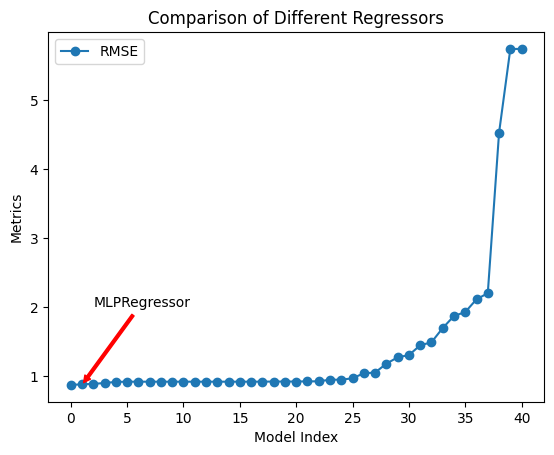

In [59]:
idx = [i for i in range(41)]
plt.plot(idx, models["RMSE"][:41]  , label = "RMSE" , marker = 'o' )


plt.annotate(models.index[0] , 
             (1,models["RMSE"][0]) , 
             xytext  =(2,2),
             arrowprops = dict(
                               arrowstyle = "simple",
                 color = "red"
                              ))

plt.xlabel("Model Index")
plt.ylabel("Metrics")
plt.title("Comparison of Different Regressors")
plt.legend()
plt.show()

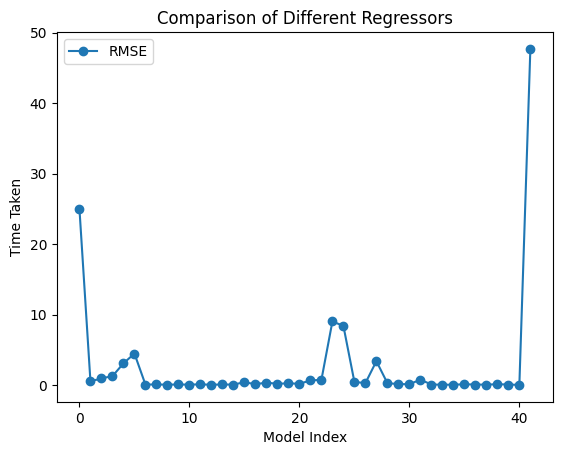

In [60]:
idx = [i for i in range(42)]
plt.plot(idx, models["Time Taken"] , label = "RMSE" ,marker = "o" )
plt.xlabel("Model Index")
plt.ylabel("Time Taken")
plt.title("Comparison of Different Regressors")
plt.legend()
plt.show()

In [61]:
models[0:15]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.98,0.98,0.87,24.98
LGBMRegressor,0.98,0.98,0.88,0.51
HistGradientBoostingRegressor,0.98,0.98,0.89,0.95
GradientBoostingRegressor,0.98,0.98,0.90,1.26
ExtraTreesRegressor,0.97,0.97,0.92,3.07
RandomForestRegressor,0.97,0.97,0.92,4.47
ARDRegression,0.97,0.97,0.92,0.07
RidgeCV,0.97,0.97,0.92,0.08
BayesianRidge,0.97,0.97,0.92,0.05
